# Slope graph for football wide table data

A script that takes a 'wide' table of a football season and returns a slope graph.

In [44]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Part A: Create dataframe
Use table location to reference a CSV of table data taken from Soccerway.com (eg: https://int.soccerway.com/national/germany/bundesliga/20202021/regular-season/r58871/tables/ - Wide Table). This data can be scraped from Soccerway using the soccerwayWideTable_scraper. The next lines then makes a number of rows-wise calcluations (eg: hom points; home goals per game).

In [45]:
country = 'germany'
league = 'bundesliga'
season = '20202021'

table_location = f'CSVs/{country}/{league}/{season}/widetable.csv'

In [48]:
df_table = pd.read_csv(table_location, index_col=False)

df_table = df_table.rename(columns={'Unnamed: 0': 'Team'})
df_table['Position'] = df_table.index

df_table['home_points'] = (df_table['home_won'] * 3) + df_table['home_drawn']
df_table['home_ppg'] = df_table['home_points'] / df_table['home_mp']
df_table['home_gfpg'] = df_table['home_gf'] / df_table['home_mp']
df_table['home_gapg'] = df_table['home_ga'] / df_table['home_mp']
df_table['home_dpg'] = (df_table['home_gf'] - df_table['home_ga'])/ df_table['home_mp']

df_table['away_points'] = (df_table['away_won'] * 3) + df_table['away_drawn']
df_table['away_ppg'] = df_table['away_points'] / df_table['away_mp']
df_table['away_gfpg'] = df_table['away_gf'] / df_table['away_mp']
df_table['away_gapg'] = df_table['away_ga'] / df_table['away_mp']
df_table['away_dpg'] = (df_table['away_gf'] - df_table['away_ga'])/ df_table['away_mp']

df_table

,Team,total_mp,total_won,total_drawn,total_lost,total_gf,total_ga,home_mp,home_won,home_drawn,...,home_points,home_ppg,home_gfpg,home_gapg,home_dpg,away_points,away_ppg,away_gfpg,away_gapg,away_dpg
0,Bayern Munich,34,24,6,4,99,44,17,13,4,...,43,2.529412,3.764706,1.235294,2.529412,35,2.058824,2.058824,1.352941,0.705882
1,RB Leipzig,34,19,8,7,60,32,17,11,4,...,37,2.176471,1.705882,0.764706,0.941176,28,1.647059,1.823529,1.117647,0.705882
2,Borussia Do…,34,20,4,10,75,46,17,11,2,...,35,2.058824,2.352941,1.176471,1.176471,29,1.705882,2.058824,1.529412,0.529412
3,Wolfsburg,34,17,10,7,61,37,17,10,4,...,34,2.000000,1.882353,0.941176,0.941176,27,1.588235,1.705882,1.235294,0.470588
4,Eintracht F…,34,16,12,6,69,53,17,10,7,...,37,2.176471,2.176471,1.176471,1.000000,23,1.352941,1.882353,1.941176,-0.058824
5,Bayer Lever…,34,14,10,10,53,39,17,8,5,...,29,1.705882,2.000000,1.294118,0.705882,23,1.352941,1.117647,1.000000,0.117647
6,Union Berlin,34,12,14,8,50,43,17,8,8,...,32,1.882353,1.882353,1.058824,0.823529,18,1.058824,1.058824,1.470588,-0.411765
7,Borussia M'…,34,13,10,11,64,56,17,8,4,...,28,1.647059,1.882353,1.117647,0.764706,21,1.235294,1.882353,2.176471,-0.294118
8,Stuttgart,34,12,9,13,56,55,17,5,6,...,21,1.235294,1.588235,1.529412,0.058824,24,1.411765,1.705882,1.705882,0.000000
9,Freiburg,34,12,9,13,52,52,17,7,6,...,27,1.588235,1.941176,1.352941,0.588235,18,1.058824,1.117647,1.705882,-0.588235


### Part 2: Graph

The p2pGraph function then creates individual p2p graphs, with two teams able to be highlighted. These two teams are noted as 'home' and 'away' as this function is designed to be be used automatically each matchday to produce p2p graphs for that round's various opponents. These two teams are positioned on top of all the other teams' lines (in other words, they are moved to the bottom of the dataframe table).

Four custom style functions have been built into the graph function: 'Default', 'Minimalist', 'Pastely', 'LightBlueBack'. Access these via the chosen_style variable.

Unlike the Plotly Express version, this allows for subplotting. 

In [71]:
def allPlots(league, season, hometeam, hometeam_altname, awayteam, awayteam_altname, chosen_style):
    
    fig = make_subplots(rows=1, cols=4, subplot_titles = ['x', 'x', 'x', 'x'])
    
    fig.update_layout(margin=dict(l=1, r=0, t=100, b=20), height=600, width=980)
    
    # Title
    fig.update_layout(title=f"<b>{league} {season}</b></br></br>")
    fig['layout']['title']['x'] = 0

    
    ### INSERT DATA ###############################################################################
    
    # Put the seleceted teams at bottom of table, so their lines appear on top of graph
    
    df_table.loc[df_table['Team'] == hometeam,'Team'] = hometeam_altname
    df_table.loc[df_table['Team'] == awayteam,'Team'] = awayteam_altname
    
    hometeam, awayteam = hometeam_altname, awayteam_altname
    
    pos1 = df_table.loc[df_table['Team'] == hometeam, 'Position'].values[0]
    pos2 = df_table.loc[df_table['Team'] == awayteam, 'Position'].values[0]

    df_plot = df_table.copy()

    df_plot.loc[18] = df_plot.loc[pos2]
    df_plot.loc[19] = df_plot.loc[pos1]  

    #df_plot = df_plot.drop([pos1-1, pos2-1])

    
    print(pos1, pos2)
        
    def makeSuplot(subplot, criteriaL, criteriaR):

        for index, row in df_plot.iterrows():

            fig.add_trace(
                go.Scatter(
                    x = [0,1],
                    y = [row[criteriaL], row[criteriaR]],
                    mode="lines",
                    name = row['Team'],
                    line=dict(color="black"),
                ),
                row=1, col=subplot
            )
            
    makeSuplot(1, 'home_ppg', 'away_ppg')
    makeSuplot(2, 'home_gfpg', 'away_gfpg')
    makeSuplot(3, 'home_gapg', 'away_gapg')
    makeSuplot(4, 'home_dpg', 'away_dpg')



    ### STYLING ###################################################################################
    
    ## Stylesheet 
    styles_df = pd.read_csv('styles.csv', index_col=0)
    
    plot_bg = styles_df.loc[chosen_style, 'Plot background']
    outer_bg = styles_df.loc[chosen_style, 'Outer background']
    hover_bg = styles_df.loc[chosen_style, 'Hover background']

    hometeam_color = styles_df.loc[chosen_style, 'Home team color']
    awayteam_color = styles_df.loc[chosen_style, 'Away team color']
    neutralteam_color = styles_df.loc[chosen_style, 'Neutral team color']
    
    # Main colors
    fig['layout']['plot_bgcolor'] = plot_bg
    fig['layout']['paper_bgcolor'] = outer_bg
    

    # Hover label styline    
    fig['layout']['hoverlabel']['bgcolor'] = hover_bg
    fig['layout']['hoverlabel']['font']['family'] = 'Consolas'
    fig['layout']['hoverlabel']['font']['size'] = 12

    # Text
    fig['layout']['font']['family'] = 'Arial'
    fig['layout']['font']['color'] = '#181818'
    
    
    
    
    ### CUSTOMIZING #############################################################################
    
    # Line infos
    i = 0
    for trace in fig['data']: 
         
        if trace['name'] in [hometeam, awayteam]:
            trace['showlegend'] = True
            trace['line']['width'] = 4;
            if trace['name'] == hometeam:
                trace['line']['color'] = hometeam_color
            elif trace['name'] == awayteam:
                trace['line']['color'] = awayteam_color
                
            if i > 1:
                trace['showlegend'] = False;
            i += 1
                
            
        else:
            trace['showlegend'] = False;
            trace['line']['width'] = 2;
            trace['line']['color'] = neutralteam_color
            
        trace['hovertemplate'] = f"<b>{trace['name']}</b>" + "<br>%{x}: %{y}<extra></extra>"
    
    # X-Axes
    fig.update_layout(xaxis1=dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Home', 'Away']))
    fig.update_layout(xaxis2=dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Home', 'Away']))
    fig.update_layout(xaxis3=dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Home', 'Away']))
    fig.update_layout(xaxis4=dict(tickmode = 'array', tickvals = [0, 1], ticktext = ['Home', 'Away']))
    
    # Y-Axes range
    
    hi =  max([df_table['home_gfpg'].max(), df_table['away_gfpg'].max(), df_table['home_gapg'].max(), df_table['away_gapg'].max(), ])
    fig.update_layout(yaxis1=dict(range=[0.001, 3]))
    fig.update_layout(yaxis2=dict(range=[0.001, hi]))
    fig.update_layout(yaxis3=dict(range=[0.001, hi]))
    
    lo =  min([df_table['home_dpg'].min(), df_table['away_dpg'].min()])
    hi =  max([df_table['home_dpg'].max(), df_table['away_dpg'].max()])
    fig.update_layout(yaxis4=dict(range=[lo, hi]))
    
    
    # Subheads
    
    subtitle_A = 'Points per game'
    subtitle_B = 'Goals for per game'
    subtitle_C = 'Goals against per game'
    subtitle_D = 'Goal difference per game'

    fig.layout.annotations[0]['text'] = f'<b>{subtitle_A}</b>'
    fig.layout.annotations[1]['text'] = f'<b>{subtitle_B}</b>'
    fig.layout.annotations[2]['text'] = f'<b>{subtitle_C}</b>'
    fig.layout.annotations[3]['text'] = f'<b>{subtitle_D}</b>'

    for i in range(0,4):
        fig.layout.annotations[i]['font']['size'] = 12
        fig.layout.annotations[i]['x'] = i / 3.8
        fig.layout.annotations[i]['xanchor'] = 'left'
        fig.layout.annotations[i]['y'] = 1.05
        
    # Legend
    
    fig['layout']['legend']['orientation'] = 'h'
    fig['layout']['legend']['yanchor'] = 'top'
    fig['layout']['legend']['xanchor'] = 'left'
    
    fig.update_layout(legend=dict(
        orientation="h",
        x=0.75,
        yanchor="bottom", y=1.1,
        ))

    fig.show()
    
    fig.write_html(f"Visualisations/{league}_{season}_{hometeam}_{awayteam}_muliplot_point2pointGraph.html")


13 6


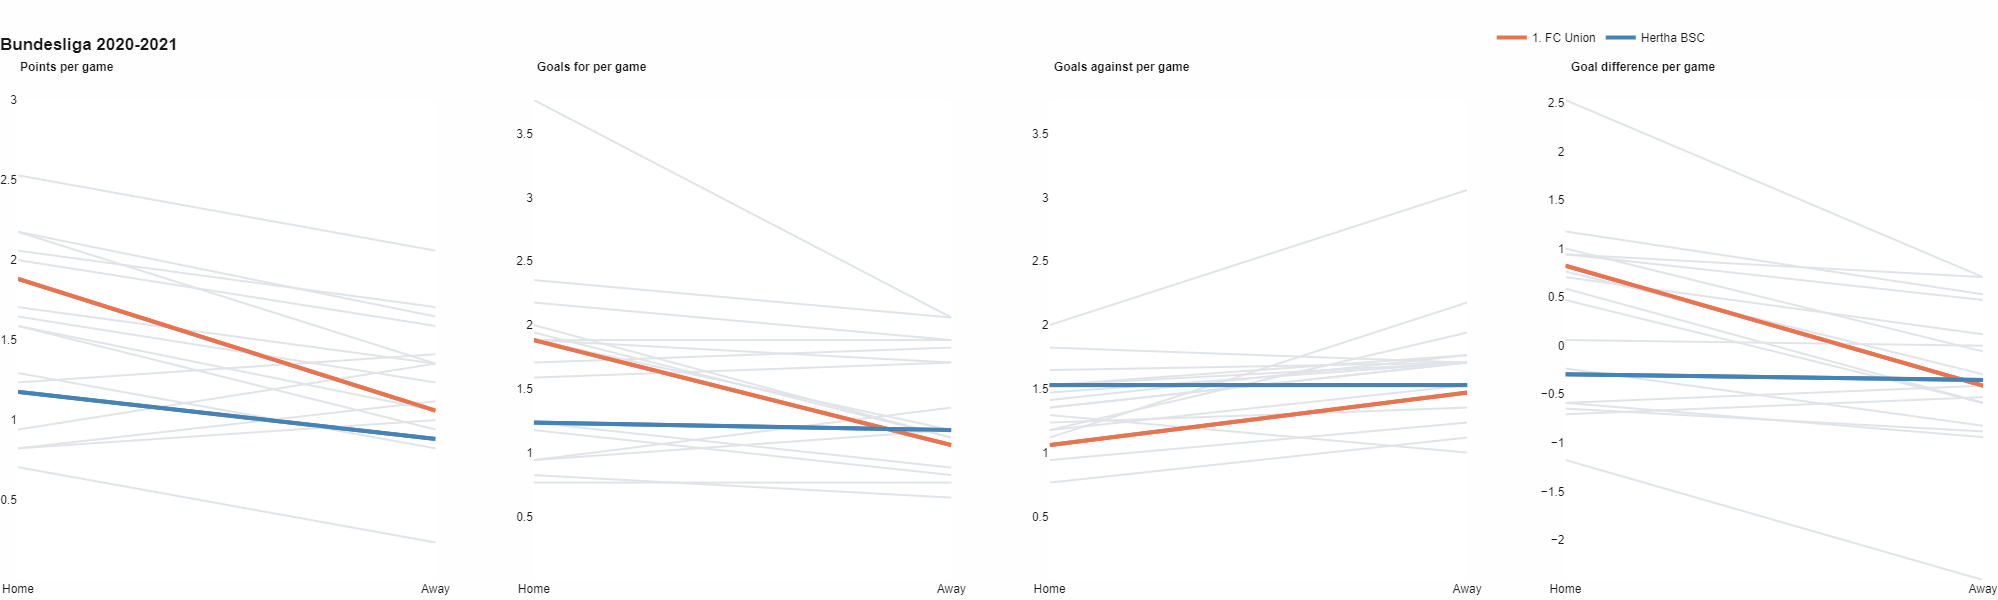

In [72]:
  
### VARIABLES ############################################################################

league = 'Bundesliga'
season = '2020-2021'
hometeam = 'Hertha Berlin'
hometeam_altname = 'Hertha BSC'
awayteam = 'Union Berlin'
awayteam_altname = '1. FC Union'
chosen_style = 'Minimalist'

allPlots(league, season, hometeam, hometeam_altname, awayteam, awayteam_altname, chosen_style)